In [ ]:
#Data_Source
#https://www.kaggle.com/datasets/veleon/ham-and-spam-dataset

In [11]:
####################
##importing packages
####################

from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, GRU, Bidirectional
from keras.optimizers import RMSprop
from keras.utils import to_categorical, pad_sequences
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt



In [13]:
####################
##collecting Data 
####################


import os

path = '/spam_ham/'
mails = []
labels = []

for label in ['spam/', 'ham/'] :
    
    f_name  = os.listdir(os.path.join(path,label))
    
    for name in f_name :
        f = open((path + label + name), 'r', encoding = 'latin-1')
        bolk = f.read()
        mails.append(bolk)
        labels.append(label[:-1])
        
df = pd.DataFrame({'emails' : mails, 'label':labels})

In [21]:
from sklearn.utils import shuffle
data = shuffle(df)

In [22]:
data.head()

,emails,label
2938,From rssfeeds@jmason.org Mon Oct 7 12:05:30 ...,ham
471,From ilug-admin@linux.ie Wed Sep 25 10:29:22 ...,spam
2261,Return-Path: tim.one@comcast.net\nDelivery-Dat...,ham
2523,From rssfeeds@jmason.org Thu Sep 26 11:03:25 ...,ham
2535,From rssfeeds@jmason.org Thu Sep 26 16:33:47 ...,ham


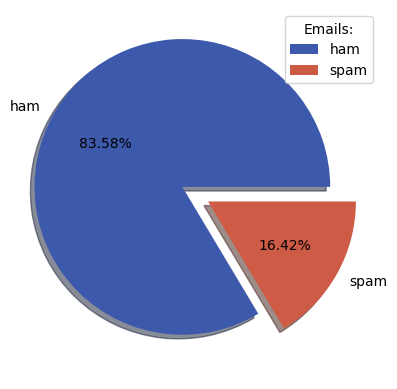

In [56]:
########################################
##visualize repartition of the data
########################################

from collections import Counter
lab=Counter(data['label']).keys()
size= Counter(data['label']).values()

colors=['#3D59AB','#CD5B45']
plt.pie(size,labels=lab,colors=colors,autopct='%1.2f%%',shadow=True,explode=(0.1, 0.1))
plt.legend(title = "Emails:")

plt.show() 

In [59]:
########################################
##preparing the labels
########################################

labels= LabelEncoder().fit_transform(data['label'])
labels= labels.reshape(-1,1)

labels.shape

(3052, 1)

In [62]:
###########################################################
##Tokenisation of the emails and preparing to train
###########################################################

max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(data['emails'])
sequences = tok.texts_to_sequences(data['emails'])

data = pad_sequences(sequences,maxlen=max_len,padding='post')

data.shape

(3052, 150)

In [63]:
####################
##Test_train split
####################
x_train,x_test,train_label,test_label=train_test_split(data,labels,test_size=0.33,random_state=0)

In [ ]:
####################
## LSTM model
####################

In [105]:
from keras.models import Sequential
modelLSTM= Sequential()
modelLSTM.add(Embedding(10000,150,input_length=max_len))
modelLSTM.add(LSTM(150,dropout=0.7))
modelLSTM.add(Dense(1,activation='sigmoid'))

modelLSTM.compile('adam',loss='binary_crossentropy',metrics=['accuracy'])

In [106]:
import time
debut=time.time()
historyLSTM=modelLSTM.fit(x_train,train_label,batch_size=200,epochs=10,validation_split=0.2)
temps_LSTM=time.time()-debut

Epoch 1/10
9/9 [==============================] - 10s 871ms/step - loss: 0.5854 - accuracy: 0.8110 - val_loss: 0.4126 - val_accuracy: 0.7848
Epoch 2/10
9/9 [==============================] - 7s 822ms/step - loss: 0.3432 - accuracy: 0.8642 - val_loss: 0.3413 - val_accuracy: 0.8411
Epoch 3/10
9/9 [==============================] - 7s 822ms/step - loss: 0.2267 - accuracy: 0.8966 - val_loss: 0.1996 - val_accuracy: 0.9046
Epoch 4/10
9/9 [==============================] - 7s 824ms/step - loss: 0.1297 - accuracy: 0.9437 - val_loss: 0.1030 - val_accuracy: 0.9707
Epoch 5/10
9/9 [==============================] - 7s 831ms/step - loss: 0.0822 - accuracy: 0.9798 - val_loss: 0.0786 - val_accuracy: 0.9731
Epoch 6/10
9/9 [==============================] - 7s 833ms/step - loss: 0.0525 - accuracy: 0.9853 - val_loss: 0.0414 - val_accuracy: 0.9878
Epoch 7/10
9/9 [==============================] - 7s 829ms/step - loss: 0.0590 - accuracy: 0.9847 - val_loss: 0.0266 - val_accuracy: 0.9951
Epoch 8/10
9/9 [===

In [107]:
predLSTM=modelLSTM.predict(x_test)
accr_LSTM=modelLSTM.evaluate(x_test,test_label)

32/32 [==============================] - 3s 79ms/step - loss: 0.0438 - accuracy: 0.9921


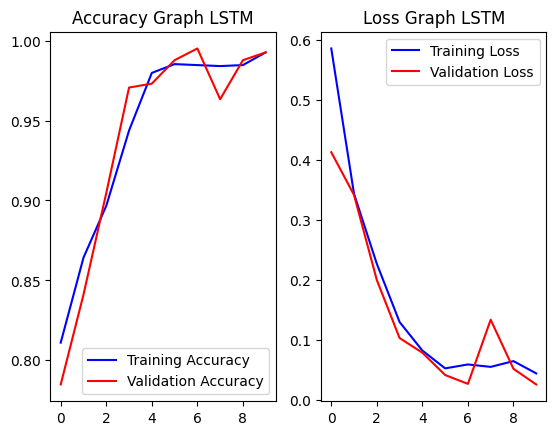

In [108]:
acc = historyLSTM.history['accuracy']
val_acc = historyLSTM.history['val_accuracy']

epochs = range(len(acc))

loss = historyLSTM.history['loss']
val_loss = historyLSTM.history['val_loss']

plt.figure()

plt.subplot(1,2,1)

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph LSTM')
plt.legend()


plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph LSTM')
plt.legend()

plt.show()

In [ ]:
####################
## BLSTM model
####################

In [109]:
from keras.models import Sequential
modelBLSTM= Sequential()
modelBLSTM.add(Embedding(10000,150,input_length=max_len))
modelBLSTM.add(Bidirectional(LSTM(150,dropout=0.7)))
modelBLSTM.add(Dense(1,activation='sigmoid'))

modelBLSTM.compile('adam',loss='binary_crossentropy',metrics=['accuracy'])

In [110]:
import time
debut=time.time()
historyBLSTM=modelBLSTM.fit(x_train,train_label,batch_size=200,epochs=10,validation_split=0.2)
temps_BLSTM=time.time()-debut

Epoch 1/10
9/9 [==============================] - 27s 2s/step - loss: 0.5782 - accuracy: 0.8135 - val_loss: 0.6493 - val_accuracy: 0.7848
Epoch 2/10
9/9 [==============================] - 15s 2s/step - loss: 0.3791 - accuracy: 0.8612 - val_loss: 0.3665 - val_accuracy: 0.8337
Epoch 3/10
9/9 [==============================] - 15s 2s/step - loss: 0.2738 - accuracy: 0.8905 - val_loss: 0.3033 - val_accuracy: 0.8435
Epoch 4/10
9/9 [==============================] - 15s 2s/step - loss: 0.1872 - accuracy: 0.9058 - val_loss: 0.1571 - val_accuracy: 0.9169
Epoch 5/10
9/9 [==============================] - 17s 2s/step - loss: 0.1032 - accuracy: 0.9645 - val_loss: 0.0722 - val_accuracy: 0.9780
Epoch 6/10
9/9 [==============================] - 15s 2s/step - loss: 0.0639 - accuracy: 0.9810 - val_loss: 0.0325 - val_accuracy: 0.9853
Epoch 7/10
9/9 [==============================] - 16s 2s/step - loss: 0.0449 - accuracy: 0.9859 - val_loss: 0.0280 - val_accuracy: 0.9927
Epoch 8/10
9/9 [==================

In [111]:
predBLSTM=modelBLSTM.predict(x_test)
accr_BLSTM=modelBLSTM.evaluate(x_test,test_label)

32/32 [==============================] - 4s 110ms/step - loss: 0.0300 - accuracy: 0.9931


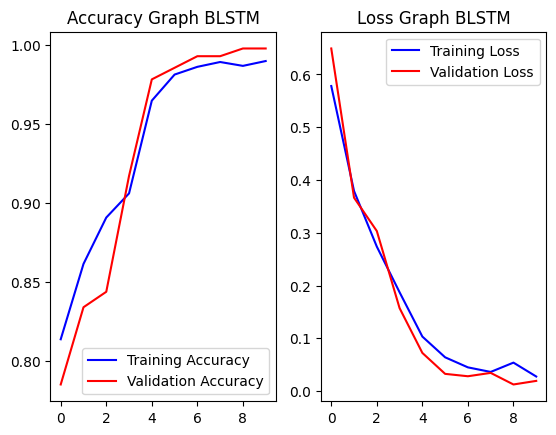

In [112]:
acc = historyBLSTM.history['accuracy']
val_acc = historyBLSTM.history['val_accuracy']

epochs = range(len(acc))

loss = historyBLSTM.history['loss']
val_loss = historyBLSTM.history['val_loss']

plt.figure()

plt.subplot(1,2,1)

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph BLSTM')
plt.legend()


plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph BLSTM')
plt.legend()

plt.show()

In [ ]:
####################
## GRU model
####################

In [143]:
from keras.models import Sequential
modelGRU= Sequential()
modelGRU.add(Embedding(10000,150,input_length=max_len))
modelGRU.add(GRU(150,dropout=0.7))
modelGRU.add(Dense(1,activation='sigmoid'))

modelGRU.compile('adam',loss='binary_crossentropy',metrics=['accuracy'])
import time
debut=time.time()
historyGRU=modelGRU.fit(x_train,train_label,batch_size=200,epochs=10,validation_split=0.2)
temps_GRU=time.time()-debut

Epoch 1/10
9/9 [==============================] - 10s 889ms/step - loss: 0.6326 - accuracy: 0.8067 - val_loss: 0.5175 - val_accuracy: 0.7848
Epoch 2/10
9/9 [==============================] - 8s 902ms/step - loss: 0.3788 - accuracy: 0.8495 - val_loss: 0.3440 - val_accuracy: 0.8289
Epoch 3/10
9/9 [==============================] - 9s 969ms/step - loss: 0.2739 - accuracy: 0.8985 - val_loss: 0.2555 - val_accuracy: 0.8900
Epoch 4/10
9/9 [==============================] - 9s 964ms/step - loss: 0.1956 - accuracy: 0.9193 - val_loss: 0.2057 - val_accuracy: 0.9071
Epoch 5/10
9/9 [==============================] - 9s 957ms/step - loss: 0.1511 - accuracy: 0.9303 - val_loss: 0.1512 - val_accuracy: 0.9340
Epoch 6/10
9/9 [==============================] - 9s 958ms/step - loss: 0.1127 - accuracy: 0.9596 - val_loss: 0.1183 - val_accuracy: 0.9609
Epoch 7/10
9/9 [==============================] - 8s 925ms/step - loss: 0.0815 - accuracy: 0.9731 - val_loss: 0.0844 - val_accuracy: 0.9707
Epoch 8/10
9/9 [===

In [142]:
predGRU=modelGRU.predict(x_test)
accr=modelGRU.evaluate(x_test,test_label)

32/32 [==============================] - 2s 73ms/step - loss: 0.0365 - accuracy: 0.9901


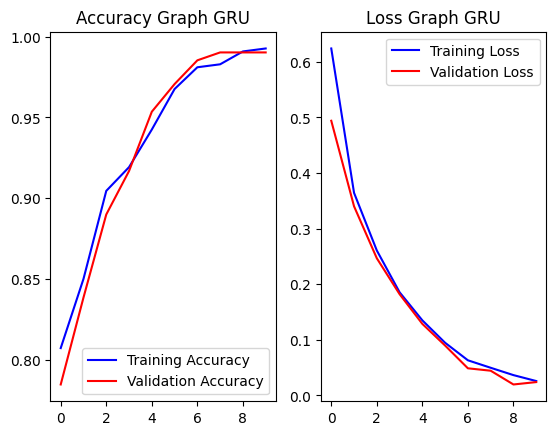

In [113]:
acc = historyGRU.history['accuracy']
val_acc = historyGRU.history['val_accuracy']

epochs = range(len(acc))

loss = historyGRU.history['loss']
val_loss = historyGRU.history['val_loss']

plt.figure()

plt.subplot(1,2,1)

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph GRU')
plt.legend()


plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph GRU')
plt.legend()

plt.show()

In [ ]:
######################################## 
## Comparing the 3 models
########################################  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


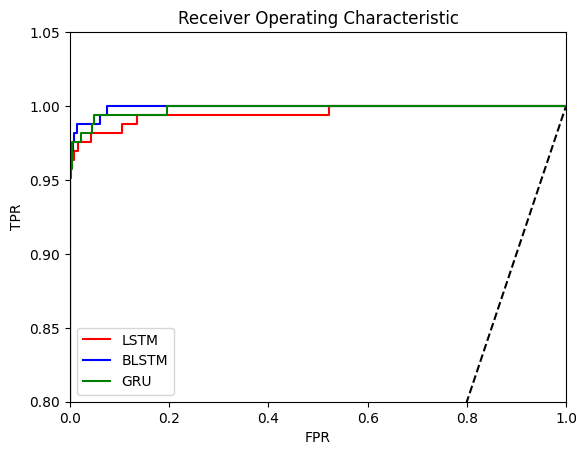

In [129]:
from sklearn.metrics import roc_curve
fp, tp, thressholds=roc_curve(test_label, predLSTM, pos_label=1)
fp1, tp1, thressholds=roc_curve(test_label, predBLSTM, pos_label=1)
fp2, tp2, thressholds=roc_curve(test_label, predGRU, pos_label=1)
 

plt.legend(loc='lower right')
plt.plot([0,1],[0,1], 'k--')
plt.plot(fp, tp, color='red', label= "LSTM")
plt.plot(fp1, tp1, color='blue', label= "BLSTM")
plt.plot(fp2, tp2, color='green', label= "GRU")
plt.legend()
plt.xlim([0,1])
plt.ylim([0.8,1.05])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

In [144]:
models=['LSTM','BLSTM','GRU']
accr=[accr_LSTM[1],accr_BLSTM[1],accr[1]]
time_complexity=[temps_LSTM,temps_BLSTM,temps_GRU]
df = pd.DataFrame({'Models' : models, 'Accuarcy':accr, 'CC':time_complexity })

In [145]:
print("Comparing the 3 models: LSTM, BLSTM and GRU")
df

Comparing the 3 models: LSTM, BLSTM and GRU


,Models,Accuarcy,CC
0,LSTM,0.992063,77.254620
1,BLSTM,0.993056,167.476021
2,GRU,0.990079,88.124985
